# Parquet File Viewer

This notebook allows you to explore and analyze parquet files in your project.


In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [15]:
# Define the parquet file path
parquet_file = "test_3.parquet"

# Check if file exists
if os.path.exists(parquet_file):
    print(f"✅ Found parquet file: {parquet_file}")
    file_size = os.path.getsize(parquet_file) / (1024 * 1024)  # Size in MB
    print(f"📁 File size: {file_size:.2f} MB")
else:
    print(f"❌ File not found: {parquet_file}")
    print("Available parquet files in current directory:")
    for file in os.listdir('.'):
        if file.endswith('.parquet'):
            print(f"  - {file}")


✅ Found parquet file: test_3.parquet
📁 File size: 2.96 MB


In [16]:
# Load the parquet file
try:
    df = pd.read_parquet(parquet_file)
    print(f"✅ Successfully loaded parquet file")
    print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading parquet file: {e}")
    df = None


✅ Successfully loaded parquet file
📊 Shape: 226 rows × 17 columns


In [17]:
# Display basic information about the dataset
if df is not None:
    print("📋 Dataset Overview:")
    print("=" * 50)
    print(f"Rows: {df.shape[0]:,}")
    print(f"Columns: {df.shape[1]}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print()
    
    print("📝 Column Information:")
    print("=" * 50)
    print(df.info())
    print()
    
    print("🔍 Data Types:")
    print("=" * 50)
    print(df.dtypes.value_counts())


📋 Dataset Overview:
Rows: 226
Columns: 17
Memory usage: 0.18 MB

📝 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              226 non-null    object 
 1   clip_id                226 non-null    object 
 2   video_path             226 non-null    object 
 3   start_sec              226 non-null    float64
 4   end_sec                226 non-null    float64
 5   execution_score_idx    226 non-null    float64
 6   skill_level_idx        226 non-null    int64  
 7   maneuver_idx           226 non-null    int64  
 8   maneuver_category_idx  226 non-null    int64  
 9   stance_idx             226 non-null    int64  
 10  wave_dir_idx           226 non-null    int64  
 11  variant                226 non-null    object 
 12  zoom_level             226 non-null    object 
 13  split                  

In [18]:
# Display first few rows
if df is not None:
    print("👀 First 10 rows:")
    print("=" * 50)
    display(df.head(10))
    
    print("\n👀 Last 5 rows:")
    print("=" * 50)
    display(df.tail(5))


👀 First 10 rows:


,sample_id,clip_id,video_path,start_sec,end_sec,execution_score_idx,skill_level_idx,maneuver_idx,maneuver_category_idx,stance_idx,wave_dir_idx,variant,zoom_level,split,pose_sequence,timestamps,sequence_length
0,SESSION_060325_C0019_clip_6_standard_seg_aee5f...,C0019_clip_6,s3://training-data/video/h264/SONY_300/SESSION...,5.655527,7.106181,6.0,1,1,2,0,0,flipped,standard,test,"[[1292.7437744140625, 80.72444152832031, 1294....","[5.655526992287918, 5.695526992287918, 5.73552...",36
1,SESSION_060325_C0019_clip_2_standard_seg_de221...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,1.662382,7.077978,3.0,0,6,1,0,0,flipped,standard,test,"[[482.45684814453125, 534.7474365234375, 486.7...","[1.6623821765209938, 1.7023821765209939, 1.742...",99
2,SESSION_060325_C0019_clip_2_standard_seg_de221...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,1.662382,7.077978,3.0,0,6,1,1,1,original,standard,test,"[[1439.3450927734375, 535.5032348632812, 1445....","[1.6623821765209938, 1.7023821765209939, 1.742...",103
3,SESSION_060325_C0019_clip_2_standard_seg_e2eb1...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,12.069948,15.235647,4.0,1,7,2,0,0,flipped,standard,test,"[[917.33154296875, 476.6456604003906, 921.6509...","[12.069948222281607, 12.109948222281606, 12.14...",79
4,SESSION_060325_C0019_clip_2_standard_seg_c2f66...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,7.352185,12.065124,4.0,1,2,3,1,1,original,standard,test,"[[1513.557861328125, 460.8958435058594, 1522.1...","[7.352185089974293, 7.392185089974293, 7.43218...",118
5,SESSION_060325_C0019_clip_2_standard_seg_c2f66...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,7.352185,12.065124,4.0,1,2,3,0,0,flipped,standard,test,"[[405.5494079589844, 461.25384521484375, 409.8...","[7.352185089974293, 7.392185089974293, 7.43218...",118
6,SESSION_060325_C0019_clip_2_standard_seg_e2eb1...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,12.069948,15.235647,4.0,1,7,2,1,1,original,standard,test,"[[1003.3482666015625, 476.802734375, 1011.9765...","[12.069948222281607, 12.109948222281606, 12.14...",79
7,SESSION_060325_C0019_clip_2_standard_seg_13845...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,15.245295,19.649751,4.0,1,4,1,1,1,original,standard,test,"[[1318.0123291015625, 108.18438720703125, 1329...","[15.24529490214676, 15.28529490214676, 15.3252...",97
8,SESSION_060325_C0019_clip_2_standard_seg_13845...,C0019_clip_2,s3://training-data/video/h264/SONY_300/SESSION...,15.245295,19.649751,4.0,1,4,1,0,0,flipped,standard,test,"[[600.3402099609375, 107.31640625, 606.0853271...","[15.24529490214676, 15.28529490214676, 15.3252...",97
9,SESSION_060325_C0019_clip_6_standard_seg_8bf7a...,C0019_clip_6,s3://training-data/video/h264/SONY_300/SESSION...,7.108548,8.226118,6.0,1,2,3,0,0,flipped,standard,test,"[[1061.2598876953125, 204.8671417236328, 1064....","[7.10854786043927, 7.14854786043927, 7.1885478...",28



👀 Last 5 rows:


,sample_id,clip_id,video_path,start_sec,end_sec,execution_score_idx,skill_level_idx,maneuver_idx,maneuver_category_idx,stance_idx,wave_dir_idx,variant,zoom_level,split,pose_sequence,timestamps,sequence_length
221,SESSION_040325_C0017_clip_6_standard_seg_3be73...,C0017_clip_6,s3://training-data/video/h264/SONY_70/SESSION_...,4.238837,10.010000,6.0,1,4,1,1,1,original,standard,test,"[[721.1670532226562, 578.4024658203125, 710.24...","[4.238836858006042, 4.278836858006042, 4.31883...",145
222,SESSION_040325_C0017_clip_7_standard_seg_4c9ca...,C0017_clip_7,s3://training-data/video/h264/SONY_70/SESSION_...,0.019653,5.684418,8.0,2,6,1,0,0,flipped,standard,test,"[[496.44976806640625, 508.3045349121094, 496.4...","[0.019652567975830815, 0.059652567975830816, 0...",142
223,SESSION_040325_C0017_clip_7_standard_seg_36125...,C0017_clip_7,s3://training-data/video/h264/SONY_70/SESSION_...,9.850937,13.010000,8.0,2,7,2,1,1,original,standard,test,"[[1811.72802734375, 565.2196655273438, 1813.16...","[9.85093655589124, 9.890936555891239, 9.930936...",79
224,SESSION_040325_C0017_clip_11_standard_seg_953e...,C0017_clip_11,s3://training-data/video/h264/SONY_70/SESSION_...,4.665517,12.674912,7.0,1,7,2,0,0,flipped,standard,test,"[[892.00390625, 834.8723754882812, 894.8227539...","[4.665516616314199, 4.705516616314199, 4.74551...",200
225,SESSION_040325_C0017_clip_7_standard_seg_36125...,C0017_clip_7,s3://training-data/video/h264/SONY_70/SESSION_...,9.850937,13.010000,8.0,2,7,2,0,0,flipped,standard,test,"[[108.9184799194336, 562.5018310546875, 108.91...","[9.85093655589124, 9.890936555891239, 9.930936...",79


In [19]:
# Statistical summary
if df is not None:
    print("📊 Statistical Summary:")
    print("=" * 50)
    display(df.describe(include='all'))


📊 Statistical Summary:


,sample_id,clip_id,video_path,start_sec,end_sec,execution_score_idx,skill_level_idx,maneuver_idx,maneuver_category_idx,stance_idx,wave_dir_idx,variant,zoom_level,split,pose_sequence,timestamps,sequence_length
count,226,226,226,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.00000,226.00000,226,226,226,226,226,226.000000
unique,226,32,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,226,226,NaN
top,SESSION_060325_C0019_clip_6_standard_seg_aee5f...,C0023_clip_14,s3://training-data/video/h264/SONY_300/SESSION...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flipped,standard,test,"[[1292.7437744140625, 80.72444152832031, 1294....","[5.655526992287918, 5.695526992287918, 5.73552...",NaN
freq,1,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,226,226,1,1,NaN
mean,NaN,NaN,NaN,6.239790,9.598884,6.628319,1.292035,4.805310,1.761062,0.50000,0.50000,NaN,NaN,NaN,NaN,NaN,72.044248
std,NaN,NaN,NaN,5.263015,5.076145,1.617651,0.510884,2.439885,0.887186,0.50111,0.50111,NaN,NaN,NaN,NaN,NaN,48.920778
min,NaN,NaN,NaN,0.000000,2.446018,3.000000,0.000000,1.000000,0.000000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,7.000000
25%,NaN,NaN,NaN,1.697515,5.684418,6.000000,1.000000,3.000000,1.000000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,37.250000
50%,NaN,NaN,NaN,5.621967,8.798232,6.000000,1.000000,6.000000,2.000000,0.50000,0.50000,NaN,NaN,NaN,NaN,NaN,61.000000
75%,NaN,NaN,NaN,9.251254,12.065124,8.000000,2.000000,7.000000,2.000000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,91.000000


In [20]:
# Check for missing values
if df is not None:
    print("🔍 Missing Values Analysis:")
    print("=" * 50)
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Count': missing_data.values,
        'Missing Percentage': missing_percent.values
    })
    
    # Only show columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        display(missing_df)
    else:
        print("✅ No missing values found in the dataset!")


🔍 Missing Values Analysis:
✅ No missing values found in the dataset!


📈 Visualizing 9 numeric columns:


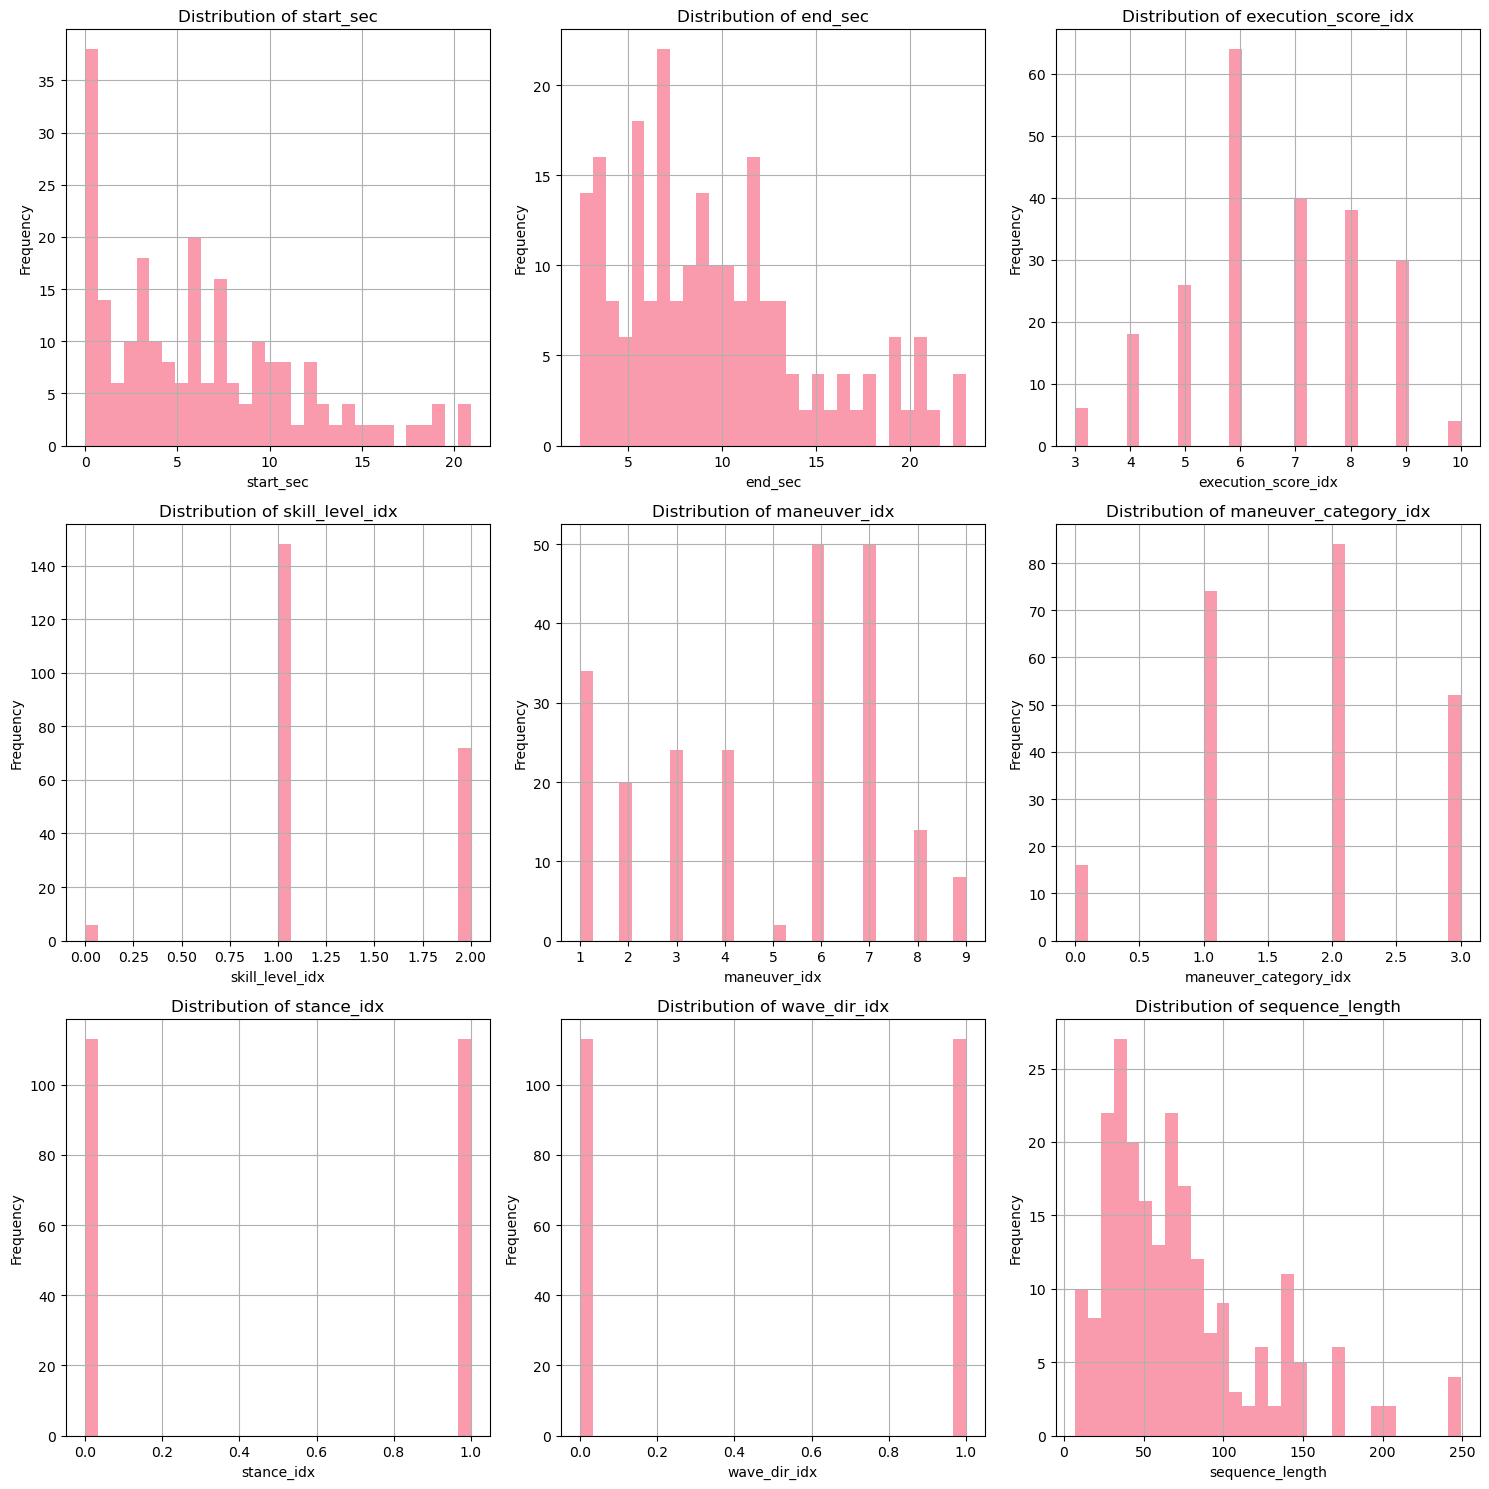

In [21]:
# Visualize data distribution for numeric columns
if df is not None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        print(f"📈 Visualizing {len(numeric_cols)} numeric columns:")
        print("=" * 50)
        
        # Create subplots for numeric columns
        n_cols = min(3, len(numeric_cols))
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            if i < len(axes):
                df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        # Hide empty subplots
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("📊 No numeric columns found for visualization")


In [22]:
# Visualize categorical columns
# if df is not None:
#     categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
#     if len(categorical_cols) > 0:
#         print(f"📊 Visualizing {len(categorical_cols)} categorical columns:")
#         print("=" * 50)
        
#         for col in categorical_cols[:5]:  # Limit to first 5 categorical columns
#             print(f"\n🔤 {col}:")
#             value_counts = df[col].value_counts()
#             print(f"Unique values: {df[col].nunique()}")
#             print("Top 10 values:")
#             display(value_counts.head(10))
            
#             # Plot if not too many unique values
#             if df[col].nunique() <= 20:
#                 plt.figure(figsize=(10, 6))
#                 value_counts.plot(kind='bar')
#                 plt.title(f'Distribution of {col}')
#                 plt.xlabel(col)
#                 plt.ylabel('Count')
#                 plt.xticks(rotation=45)
#                 plt.tight_layout()
#                 plt.show()
#     else:
#         print("📊 No categorical columns found for visualization")


In [23]:
# Interactive data exploration
if df is not None:
    print("🔍 Interactive Data Exploration:")
    print("=" * 50)
    print("You can now explore the data interactively:")
    print(f"- DataFrame name: 'df'")
    print(f"- Shape: {df.shape}")
    print(f"- Columns: {list(df.columns)}")
    print()
    print("Try these commands:")
    print("- df.columns")
    print("- df['column_name']")
    print("- df.groupby('column_name').size()")
    print("- df.corr()  # for numeric columns")
    print("- df.sample(10)  # random sample")


🔍 Interactive Data Exploration:
You can now explore the data interactively:
- DataFrame name: 'df'
- Shape: (226, 17)
- Columns: ['sample_id', 'clip_id', 'video_path', 'start_sec', 'end_sec', 'execution_score_idx', 'skill_level_idx', 'maneuver_idx', 'maneuver_category_idx', 'stance_idx', 'wave_dir_idx', 'variant', 'zoom_level', 'split', 'pose_sequence', 'timestamps', 'sequence_length']

Try these commands:
- df.columns
- df['column_name']
- df.groupby('column_name').size()
- df.corr()  # for numeric columns
- df.sample(10)  # random sample


In [24]:
# Save processed data (optional)
if df is not None:
    print("💾 Data Export Options:")
    print("=" * 50)
    print("You can save the data in different formats:")
    print("- df.to_csv('processed_data.csv', index=False)")
    print("- df.to_excel('processed_data.xlsx', index=False)")
    print("- df.to_parquet('processed_data.parquet')")
    print("- df.to_json('processed_data.json', orient='records')")
    print()
    print("Example usage:")
    print("# Uncomment and run the line below to save as CSV")
    print("# df.to_csv('train_processed.csv', index=False)")


💾 Data Export Options:
You can save the data in different formats:
- df.to_csv('processed_data.csv', index=False)
- df.to_excel('processed_data.xlsx', index=False)
- df.to_parquet('processed_data.parquet')
- df.to_json('processed_data.json', orient='records')

Example usage:
# Uncomment and run the line below to save as CSV
# df.to_csv('train_processed.csv', index=False)


In [40]:
if df is not None:
    print("🎬 Single Row Frame Data Viewer:")
    # print("=" * 50)
    
    target_prefix = "C0005_clip_14"
    filtered_df = (
        df[df["clip_id"].str.startswith(target_prefix, na=False)]
        .copy()
    )

pd.set_option("display.max_colwidth", None)
display(filtered_df[["sample_id", "video_path", "clip_id"]])
# quick peek
print(f"Rows matching {target_prefix!r}: {len(filtered_df)}")
display(filtered_df.head())


🎬 Single Row Frame Data Viewer:


,sample_id,video_path,clip_id
50,SESSION_080325_C0005_clip_14_standard_seg_b7fef6c7d172,s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4,C0005_clip_14
54,SESSION_080325_C0005_clip_14_standard_seg_b7fef6c7d172#aug=flip,s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4,C0005_clip_14
55,SESSION_080325_C0005_clip_14_standard_seg_d946d4ea28bb,s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4,C0005_clip_14
59,SESSION_080325_C0005_clip_14_standard_seg_47d398dd586f,s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4,C0005_clip_14
63,SESSION_080325_C0005_clip_14_standard_seg_d946d4ea28bb#aug=flip,s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4,C0005_clip_14
66,SESSION_080325_C0005_clip_14_standard_seg_47d398dd586f#aug=flip,s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4,C0005_clip_14
148,SESSION_020325_C0005_clip_14_standard_seg_9bdd5758de37#aug=flip,s3://training-data/video/h264/SONY_70/SESSION_020325/C0005_clip_14.mp4,C0005_clip_14
151,SESSION_020325_C0005_clip_14_standard_seg_9bdd5758de37,s3://training-data/video/h264/SONY_70/SESSION_020325/C0005_clip_14.mp4,C0005_clip_14
153,SESSION_020325_C0005_clip_14_standard_seg_5906ee817730,s3://training-data/video/h264/SONY_70/SESSION_020325/C0005_clip_14.mp4,C0005_clip_14
154,SESSION_020325_C0005_clip_14_standard_seg_c4b13baee399#aug=flip,s3://training-data/video/h264/SONY_70/SESSION_020325/C0005_clip_14.mp4,C0005_clip_14


Rows matching 'C0005_clip_14': 14


sample_id  \
50           SESSION_080325_C0005_clip_14_standard_seg_b7fef6c7d172   
54  SESSION_080325_C0005_clip_14_standard_seg_b7fef6c7d172#aug=flip   
55           SESSION_080325_C0005_clip_14_standard_seg_d946d4ea28bb   
59           SESSION_080325_C0005_clip_14_standard_seg_47d398dd586f   
63  SESSION_080325_C0005_clip_14_standard_seg_d946d4ea28bb#aug=flip   

          clip_id  \
50  C0005_clip_14   
54  C0005_clip_14   
55  C0005_clip_14   
59  C0005_clip_14   
63  C0005_clip_14   

                                                                 video_path  \
50  s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4   
54  s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4   
55  s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4   
59  s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4   
63  s3://training-data/video/h264/SONY_300/SESSION_080325/C0005_clip_14.mp4   

    start_sec    end_sec  execution_score_idx  skill_level_idx  maneuver_idx  \
50  10.190090  11.475578                  6.0                1             8   
54  10.190090  11.475578                  6.0                1             8   
55   9.156671  10.180090                  8.0                2             1   
59   0.884319   9.146671                  9.0                2             7   
63   9.156671  10.180090                  8.0                2             1   

    maneuver_category_idx  stance_idx  wave_dir_idx   variant zoom_level  \
50                      0           1             1  original   standard   
54                      0           0             0   flipped   standard   
55                      2           1             1  original   standard   
59                      2           1             1  original   standard   
63                      2           0             0   flipped   standard   

   split  \
50  test   
54  test   
55  test   
59  test   
63  test   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# Display all frame data for a single row
if df is not None:
    print("🎬 Single Row Frame Data Viewer:")
    print("=" * 50)
    
    # Select a row (you can change this index)
    row_index = 89  # Change this to view different rows
    
    if row_index < len(df):
        print(f"📋 Displaying all data for row {row_index}:")
        print("=" * 50)
        
        # Get the row data
        row_data = df.iloc[row_index]
        
        # Display all columns and their values
        for col_name, value in row_data.items():
            print(f"{col_name}: {value}")
        
        print("\n" + "=" * 50)
        print("📊 Row Summary:")
        print(f"Total columns: {len(row_data)}")
        print(f"Non-null values: {row_data.notna().sum()}")
        print(f"Null values: {row_data.isna().sum()}")
        
        # If there are pose-related columns, show them more clearly
        pose_columns = [col for col in df.columns if 'pose' in col.lower() or 'keypoint' in col.lower() or 'joint' in col.lower()]
        if pose_columns:
            print(f"\n🎯 Pose-related columns found: {len(pose_columns)}")
            for col in pose_columns:
                print(f"  - {col}: {row_data[col]}")
    else:
        print(f"❌ Row index {row_index} is out of range. Dataset has {len(df)} rows.")
        print("Available row indices: 0 to", len(df) - 1)


🎬 Single Row Frame Data Viewer:
📋 Displaying all data for row 89:
sample_id: SESSION_070325_C0023_clip_14_standard_seg_bcdd5469bf4a#aug=flip
clip_id: C0023_clip_14
video_path: s3://training-data/video/h264/SONY_300/SESSION_070325/C0023_clip_14.mp4
start_sec: 12.372782152230974
end_sec: 12.979002624671917
execution_score_idx: 6.0
skill_level_idx: 1
maneuver_idx: 1
maneuver_category_idx: 2
stance_idx: 0
wave_dir_idx: 0
variant: flipped
zoom_level: standard
split: test
pose_sequence: [array([1077.51989746,  694.33837891, 1077.51989746,  688.59936523,
        1076.08496094,  688.59936523, 1058.86608887,  684.29510498,
        1060.30102539,  685.7298584 , 1040.21228027,  700.07739258,
        1024.42834473,  687.16461182, 1011.51422119,  734.51153564,
         998.60003662,  728.77246094, 1031.60290527,  764.64129639,
        1031.60290527,  768.94561768,  946.94348145,  704.38165283,
         936.89910889,  695.77313232,  951.24816895,  793.33636475,
         948.37835693,  786.16259766, 

In [26]:
# Interactive row selector - change row_index to view different rows
if df is not None:
    print("🔍 Interactive Row Selector:")
    print("=" * 50)
    print("To view a different row, modify the row_index variable below and run this cell again.")
    print(f"Available rows: 0 to {len(df) - 1}")
    print()
    
    # You can change this to any row index you want to view
    row_index = 0  # ← Change this number to view different rows
    
    if 0 <= row_index < len(df):
        print(f"🎬 Viewing row {row_index}:")
        print("-" * 30)
        
        # Display the row as a formatted series
        row_series = df.iloc[row_index]
        
        # Create a more readable display
        for i, (col_name, value) in enumerate(row_series.items()):
            # Truncate very long values for readability
            if isinstance(value, str) and len(str(value)) > 100:
                display_value = str(value)[:100] + "..."
            else:
                display_value = value
            
            print(f"{i+1:2d}. {col_name:<30} : {display_value}")
        
        print(f"\n📊 Row {row_index} contains {len(row_series)} fields")
        
        # Show data types for this row
        print(f"\n🔍 Data types in this row:")
        for col_name, value in row_series.items():
            print(f"  {col_name}: {type(value).__name__}")
            
    else:
        print(f"❌ Invalid row index: {row_index}")
        print(f"Please use a number between 0 and {len(df) - 1}")


🔍 Interactive Row Selector:
To view a different row, modify the row_index variable below and run this cell again.
Available rows: 0 to 225

🎬 Viewing row 0:
------------------------------
 1. sample_id                      : SESSION_060325_C0019_clip_6_standard_seg_aee5ff1e7b36#aug=flip
 2. clip_id                        : C0019_clip_6
 3. video_path                     : s3://training-data/video/h264/SONY_300/SESSION_060325/C0019_clip_6.mp4
 4. start_sec                      : 5.655526992287918
 5. end_sec                        : 7.106181333674587
 6. execution_score_idx            : 6.0
 7. skill_level_idx                : 1
 8. maneuver_idx                   : 1
 9. maneuver_category_idx          : 2
10. stance_idx                     : 0
11. wave_dir_idx                   : 0
12. variant                        : flipped
13. zoom_level                     : standard
14. split                          : test
15. pose_sequence                  : [array([1292.74377441,   80.72444153, 